<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #ec7511;">Importing Data and Checking Basic Structure</h2>

In [5]:
df3 = pd.read_csv('df3_trees_cleaned.csv')

In [6]:
df3

,lat,long,genus,species,alley_tree,height,trunk_circumference,crown_diameter,sponsorship,variety
0,54.06,12.10,acer,acer platanoides,0,8.00,0.69,6.00,0,0
1,54.05,12.10,acer,acer platanoides,0,8.00,0.69,6.00,0,0
2,54.07,12.12,quercus,quercus robur,0,18.00,1.10,2.00,0,0
3,54.07,12.12,quercus,quercus rubra,1,9.00,1.00,2.00,0,0
4,54.16,12.08,tilia,tilia cordata,1,7.00,0.38,3.00,0,0
...,...,...,...,...,...,...,...,...,...,...
69348,54.19,12.15,quercus,quercus robur,0,25.00,2.40,2.00,0,0
69349,54.19,12.15,quercus,quercus robur,0,15.00,2.23,2.00,0,0
69350,54.08,12.19,prunus,prunus avium,0,13.00,1.52,1.00,0,0
69351,54.20,12.15,pinus,pinus sylvestris,0,19.00,1.58,7.00,0,0


In [7]:
df3.shape

(69353, 10)

In [8]:
df3.dtypes

lat                    float64
long                   float64
genus                   object
species                 object
alley_tree               int64
height                 float64
trunk_circumference    float64
crown_diameter         float64
sponsorship              int64
variety                 object
dtype: object

In [9]:
df3.isna().sum()

lat                    0
long                   0
genus                  0
species                0
alley_tree             0
height                 0
trunk_circumference    0
crown_diameter         0
sponsorship            0
variety                0
dtype: int64

<h2 style="color: #ec7511;">Renaming Categories in Genus</h2>

In [11]:
df3["genus"].value_counts(ascending=False)[:10]

genus
tilia       12476
acer        11874
betula       7009
quercus      6523
salix        3891
populus      2930
prunus       2822
fraxinus     2674
sorbus       2311
fagus        1850
Name: count, dtype: int64

In [12]:
# to increase understandability and useability of the analysis, I will now rename the ten most common genera to English names
rename_genera = {
    "tilia": "Lime",
    "acer": "Maple",
    "betula": "Birch",
    "quercus": "Oak",
    "salix": "Willow",
    "populus": "Poplar",
    "prunus": "Cherry",
    "fraxinus": "Ash",
    "sorbus": "Rowan",
    "fagus": "Beech",
}
df3["genus"] = df3["genus"].replace(rename_genera)
df3["genus"].value_counts(ascending=False)[:15]

genus
Lime        12476
Maple       11874
Birch        7009
Oak          6523
Willow       3891
Poplar       2930
Cherry       2822
Ash          2674
Rowan        2311
Beech        1850
alnus        1382
pinus        1358
aesculus     1349
picea        1334
carpinus     1208
Name: count, dtype: int64

<h1 style="color: #e3db24;">01 | EDA (Exploratory Data Analysis)</h1>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Overview of Exploratory Data Analysis of Tree Dataset:</strong>
<p>In the dataset, there are ten columns with different datatypes:</p>
    <ul>
        <li><strong>Nominal Categorial Data</strong> (encoded as objects): genus, species, variety (I will not use all of these columns for EDA: For now, I will <strong>limit the analysis regarding the type of tree to the column "genus"</strong>. This already contains 85 categories, watering it down even more does not seem promising at the moment. If I will not find significant relations or insights, I might include the sub-categories (species, variety) later.)</li>
        <li><strong>Nominal Categorial Data</strong> (encoded as binary numbers): alley_tree, sponsorhip</li>
        <li><strong>Continuous Numerical Data</strong>: height, trunk_circumference, crown_diameter</li>
        <li><strong>"Other"</strong>: latitude and longitude can be considered continuous data, yet I will not use them in this analysis because as single columns, they don't have any significance. I will use them for visualisations with Tableau which can also be find in the project repo.</li>
    </ul>
    
<p><strong>Procedure:</strong></p>
    <ol>
        <li>First, I will look at the distributions and descriptive statistics of <strong>only the continuous numerical data</strong> (height, trunk circumference and crown diameter of the trees). I will also check the relationships of these columns with eachother.</li>
        <li>Following this, I will look into the relationship of these <strong>numerical columns</strong> with <strong>categorial columns</strong> (genus, alley tree and sponsorship) and analyze the correlations here.</li>
        <li>Lastly, I will analyze the relationships and connections between the <strong>categorial data</strong> (genus, alley_tree and sponsorship)</li>
    </ol>
</div>

<h3 style="color: #ec300e;">Dataframe for EDA</h3>

In [16]:
df4 = df3[["genus", "alley_tree", "sponsorship", "height", "trunk_circumference", "crown_diameter"]]

<h3 style="color: #ec300e;">Splitting the Dataframe by Column Types</h3>

In [18]:
num = df4[["height", "trunk_circumference", "crown_diameter"]] # only continuous numerical columns
cat = df4[["genus", "alley_tree", "sponsorship"]] # categorial columns
cat_binary = df4[["alley_tree", "sponsorship"]] # binary coded categorial columns

<h2 style="color: #ec7511;">A | Distributions and Metrics of Continuous Numerical Columns</h2>

<h3 style="color: #ec300e;">Distributions: Histograms and Boxplots</h3>

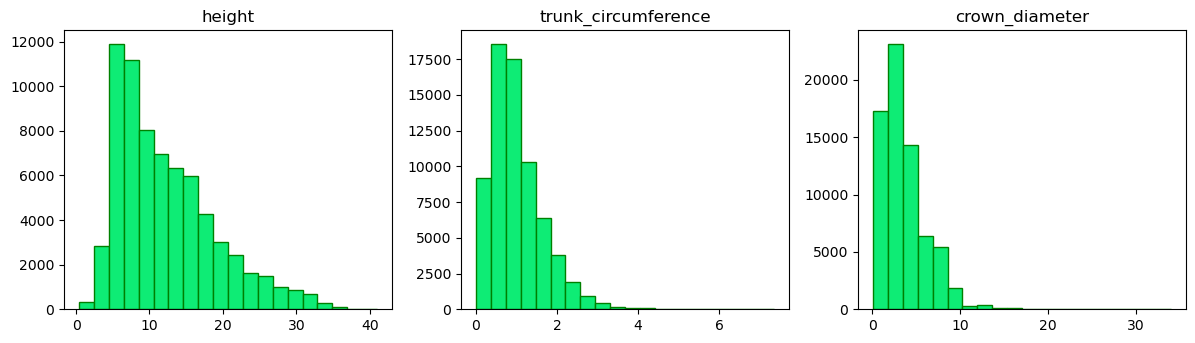

In [21]:
# histogram for continuous numberical columns
color = '#0eec75'
nrows, ncols = 5,5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()
# plotting the histograms
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.hist(num.iloc[:, i], bins=20, color=color, edgecolor='green')
    ax.set_title(num.columns[i])
plt.tight_layout()
plt.show()

In [22]:
num.skew().round(2)

height                0.97
trunk_circumference   1.36
crown_diameter        1.28
dtype: float64

In [23]:
num.kurtosis().round(2)

height                0.49
trunk_circumference   3.12
crown_diameter        2.48
dtype: float64

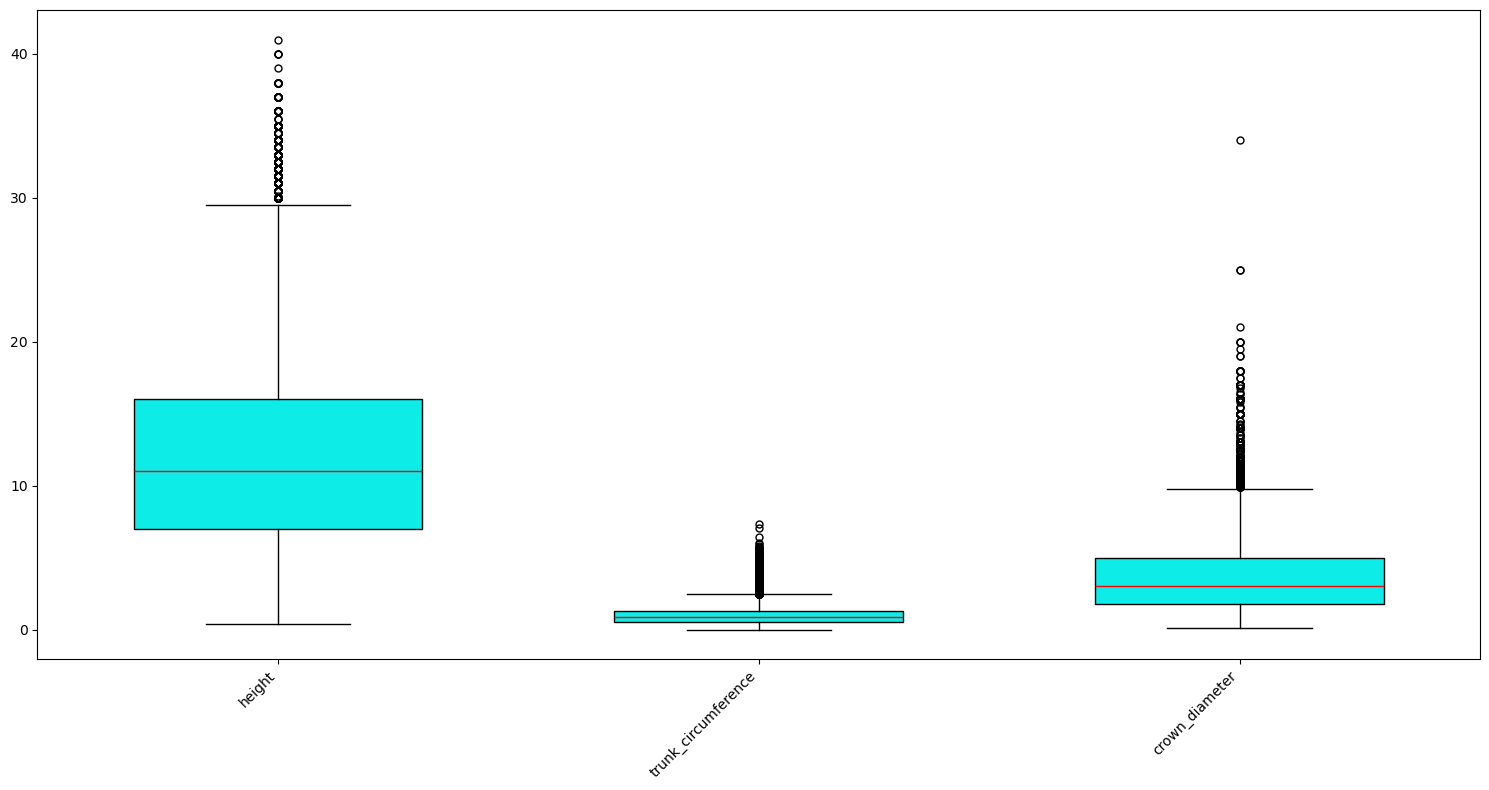

In [24]:
# boxplots for num columns
color = '#0eece8'
fig, ax = plt.subplots(figsize=(15, 8))
ax.boxplot(
    [num[col] for col in num.columns],
    vert=True,
    patch_artist=True,
    widths=0.6,
    boxprops=dict(facecolor=color),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='red', markersize=5)
)
ax.set_xticks(range(1, len(num.columns) + 1))
ax.set_xticklabels(num.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: Distribution of Continuous Data</strong>
<p>In the following, I will describe some conclusions which can be drawn from the diagramms and the additional calculations regarding skewness and kurtosis.</p>
    <ul>
        <li>In the histogram, we can see that most values regarding the <strong>height of trees</strong> can be found between <strong>5-15 metres</strong> and the frequency of trees higher than 30 metres decrease rapidly. It also shows a tendency towards a normal distribution, with a <strong>positive skewness</strong> (close to 1) which points to outliers within the bigger values. The boxplot supports this finding: many <strong>outliers</strong> are found rather close above the IQR.</li>
        <li>For the <strong>circumference of tree trunks</strong> we can see from the histogram, that almost all values are <strong>between zero and two</strong>. There is also a tendency towards normal distribution, the data is <strong>extremely positively skewed</strong> (with a skewness factor of 1.36 it is stronger than the two others) and a high kurtosis (over 3), so there are a lot of values in a very concentrated range (around 0.5 metres) . The boxplot shows that there are quite a few <strong>outliers</strong> around the upper edge of the IQR and above.</li>
        <li>For the <strong>diameter of tree crowns</strong> we can see from the histogram, that most values are <strong> between 0 and 5 metres</strong>. There is a tendency towards normal distribution but the data also is <strong>strongly positively skewed</strong> and also has a <strong>highly positive kurtosis</strong> (factor of almost 2.5). On top of that, the boxplot shows that there are many <strong>outliers</strong> around the upper edge of the IQR and above it with a few outliers far away.</strong></li>
    </ul>
<p><strong>Summary:</strong> All three continuous columns are (partly extremely) positively skewed, so they have most of their values at the lower end of the scales. All of them have a rather high kurtosis, so many data points are concentrated in a rather small range. And all of the parameters show a significant number of outliers at the upper end of the distribution.</p>
</div>


<h3 style="color: #ec300e;">Correlations</h3>

In [27]:
num_corr_pearson = round(num.corr(), 2) # linear relationship
num_corr_spearman = round(num.corr(method="spearman"), 2) # monotonic relationship

<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #ffeeba; 
    border-radius: 4px; 
    background-color: #e3db24; 
    color: #bb1066;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>Comment:</strong> Unfortunately, the numbers on the heatmap are only partly shown due to technical problems. I will therefore also display the correlation table below the heatmap.
</div>

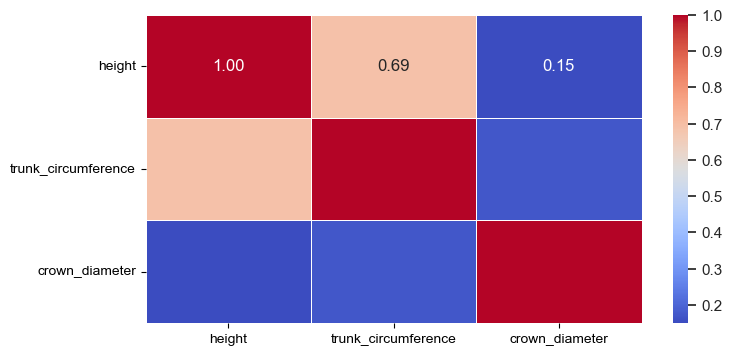

In [29]:
mask = np.zeros_like(num_corr_pearson)
f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1)
ax = sns.heatmap(num_corr_pearson, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
plt.show()

In [30]:
num_corr_pearson # linear relationship

,height,trunk_circumference,crown_diameter
height,1.00,0.69,0.15
trunk_circumference,0.69,1.00,0.17
crown_diameter,0.15,0.17,1.00


In [31]:
num_corr_spearman # monotonic relationship

,height,trunk_circumference,crown_diameter
height,1.00,0.78,0.18
trunk_circumference,0.78,1.00,0.21
crown_diameter,0.18,0.21,1.00


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from the Correlation Tables:</strong>
    <ul>
        <li>Linear relationship: Only height and trunk_circumference have a <strong>strong correlation</strong> (0.69), the other combinations have low correlations (all positive).</li>
        <li>The <strong>monotonic relationship between height and trunk_circumference is even higher</strong> (0.78), meaning that when values in one go up when the values in the other go up too, even though this does not happen in a constant rate (as the linear relationship is a little lower). The other combinations again show low correlation values.</li>
    </ul>
</d>



<h2 style="color: #ec7511;">B | Relationship between Continuous vs. Categorial Columns</h2>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next steps:</strong>
    <ul>
        <li>I will now look into the relationship of the <strong>numerical columns with categorial columns (genus, alley tree and sponsorship)</strong> and analyze the correlations here.</li>
        <li>For the descriptive statistics and the following pairplot, I will display the mesaurements in regards to the different categories of gerena. For this, I will only use genera which have more than 5,000 trees because there are a total of 85 categories in "genus" whic is too much for an in-depth analysis. This limits the analysis to <strong>four genera: Lime, Maple, Birch and Oak</strong>.</li>
    </ul>
</div>

<h3 style="color: #ec300e;">Genus and Continuous Data</h3>

<h4 style="color: #bb1010;">Descriptive Statistics by Genus</h4>

In [37]:
genus_fifteen = df4["genus"].value_counts(ascending=False)[:15]
genus_fifteen

genus
Lime        12476
Maple       11874
Birch        7009
Oak          6523
Willow       3891
Poplar       2930
Cherry       2822
Ash          2674
Rowan        2311
Beech        1850
alnus        1382
pinus        1358
aesculus     1349
picea        1334
carpinus     1208
Name: count, dtype: int64

In [38]:
genus_four = df4["genus"].value_counts(ascending=False).index[:4]
df_genus_four = df4[df4["genus"].isin(genus_four)]
df_genus_four.genus.value_counts()

genus
Lime     12476
Maple    11874
Birch     7009
Oak       6523
Name: count, dtype: int64

In [39]:
df_genus_four.groupby("genus")[["height", "trunk_circumference", "crown_diameter"]].describe()

height                                         trunk_circumference  \
          count  mean  std  min   25%   50%   75%   max               count   
genus                                                                         
Birch  7,009.00 15.11 5.74 1.00 11.00 15.00 19.00 33.00            7,009.00   
Lime  12,476.00 11.84 6.45 1.00  7.00 10.00 15.00 39.00           12,476.00   
Maple 11,874.00 10.62 5.19 0.50  7.00  9.00 14.00 35.00           11,874.00   
Oak    6,523.00 15.28 7.66 1.50  9.00 14.00 21.00 35.00            6,523.00   

                                         crown_diameter                      \
      mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
genus                                                                         
Birch 1.05 0.50 0.03 0.72 1.01 1.35 3.80       7,009.00 4.89 1.57 0.20 4.00   
Lime  1.12 0.67 0.03 0.58 0.97 1.57 6.05      12,476.00 3.92 2.45 0.30 2.00   
Maple 0.82 0.47 0.03 0.50 0.73 1.04 5.65      11,874.00 4.94 2.69 0.30 3.00   
Oak   1.24 0.69 0.00 0.72 1.15 1.71 5.65       6,523.00 2.09 0.66 0.40 2.00   

                       
       50%  75%   max  
genus                  
Birch 5.00 6.00 12.00  
Lime  3.00 5.50 15.00  
Maple 5.00 6.10 20.00  
Oak   2.00 2.00 15.00

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: Descriptive Statistics of Continuous Data</strong>
<p>In the following, I will point out a few findings from the descriptive statistics table:</p>
    <ul>
        <li>The <strong>mean values</strong> for all genera regarding height and circumference of trunk are always a little higher than the <strong>median values</strong> which shows that each genus by itself has some outliers on the higher end</strong> of values. Yet, the numbers are mostly quite close to eachother (only small dispersion) with a rather <strong>low standard deviation</strong> compared to the scales of each paramter.</li>
        <li>For the <strong>crown diameter, this is only a little different</strong> but the mean is also very similar to the median.</li>
        <li>Quite significant is the <strong>share of values below the median</strong> (<50%) and <strong>below the third quartile</strong> (<75%) compared to the maximum values of each genera and regarding each parameter. This very much underlines the findings from before: A <strong>very large amount of tree measurements are at the lower end of values</strong> with much less bigger trees.</li>
        <li>The tree genera do not differ very much in their <strong>maximum heights</strong> with limes reaching the greatest height, followed closely by maple and oak trees, and finally birch trees. The difference regarding the <strong>trunk circumference</strong> is bigger: The maximum circumferences of a lime, maple or oak tree are quite close, birch trees are thinner. Maples trees have the biggest <strong>crown diameter</strong>, with almost the doubled size of birch trees. Oak and lime trees are to be found in betweenn.</li>
        <li>The <strong>minimum values are all very similar</strong>, regardless of genera or parameter. This obviously is because of "baby trees" as the dataset is not limited to "grown trees".</li>
    </ul
</div>


<h4 style="color: #bb1010;">Pairplot: Tree Genera and Tree Measurements</h4>

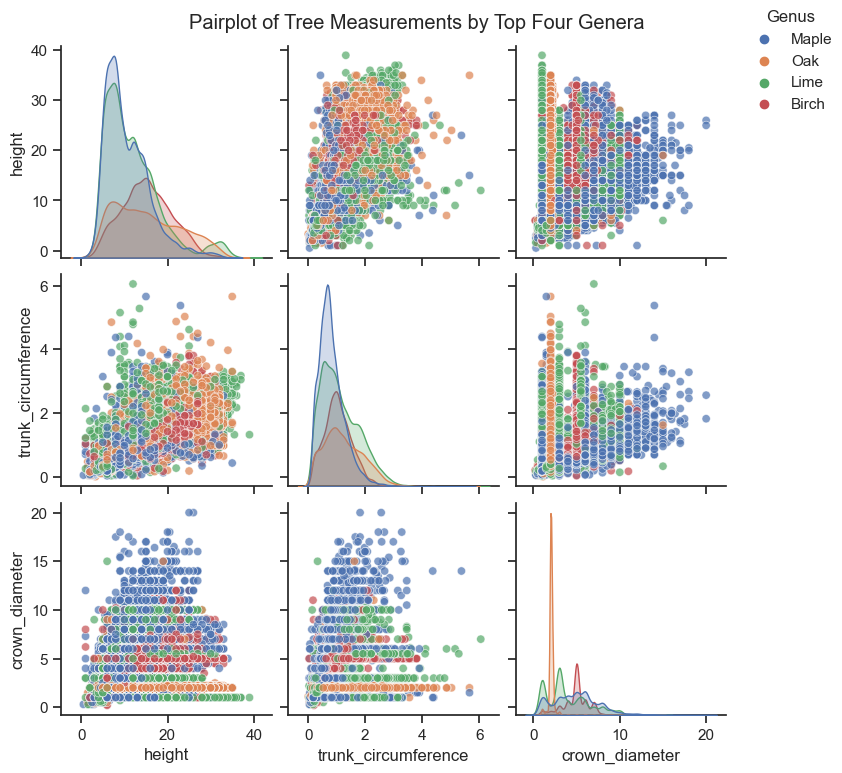

In [42]:
# pairplot for continuous data by categorial column "genus" (again only the four most common genera)
sns.set(style="ticks")
pairplot = sns.pairplot(
    df_genus_four,
    vars=["height", "trunk_circumference", "crown_diameter"],
    hue="genus",
    diag_kind="kde",  # diagonal with KDE plots
    plot_kws={"alpha": 0.7}  # transparency
)
pairplot._legend.set_bbox_to_anchor((1, 0.95))  # legend
pairplot._legend.set_title("Genus")
pairplot.fig.suptitle("Pairplot of Tree Measurements by Top Four Genera", y=1.02)
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from the Pairplot: </strong>
    <ul>
        <li>The <strong>kernel density plots</strong> show that the four different genera of trees are partly <strong>very different regarding their distribution</strong> of value which was also seen in the describe table.</li>
        <li>The <strong>scatterplots</strong> show the bivariate relation between the three parameters divided by the four most common genera. Due to many data points and overlapping, they are <strong>not easy to interprete</strong>. <strong>Maples trees (blue)</strong>  seem to have a linear relationship regarding height and crown diameter and also, to a lesser degree, regarding crown diameter and trunk circumference.</li>
    </ul>
<iv>



<h3 style="color: #ec300e;">Binary Categorial Data vs. All Continuous Data</h3>

<h4 style="color: #bb1010;">Box Plots</h4>

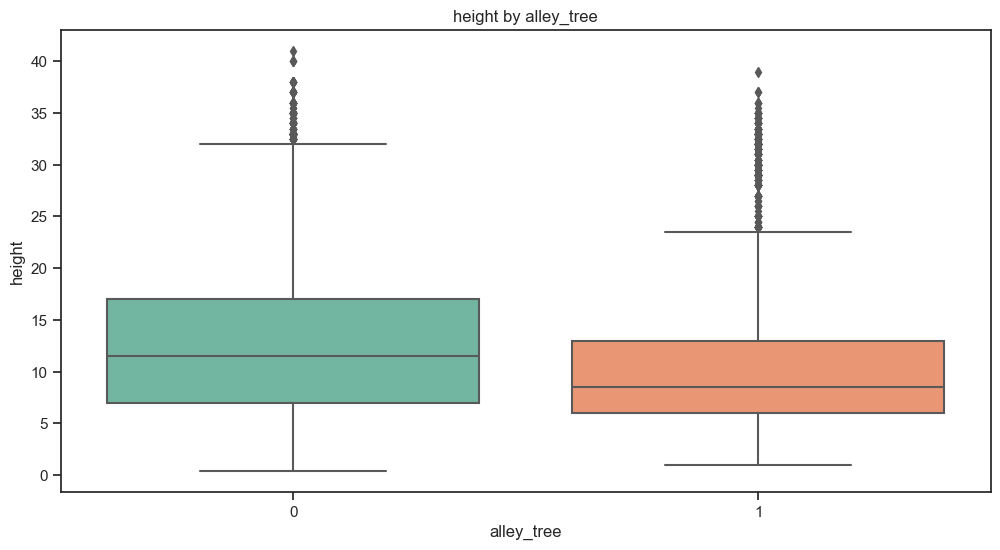

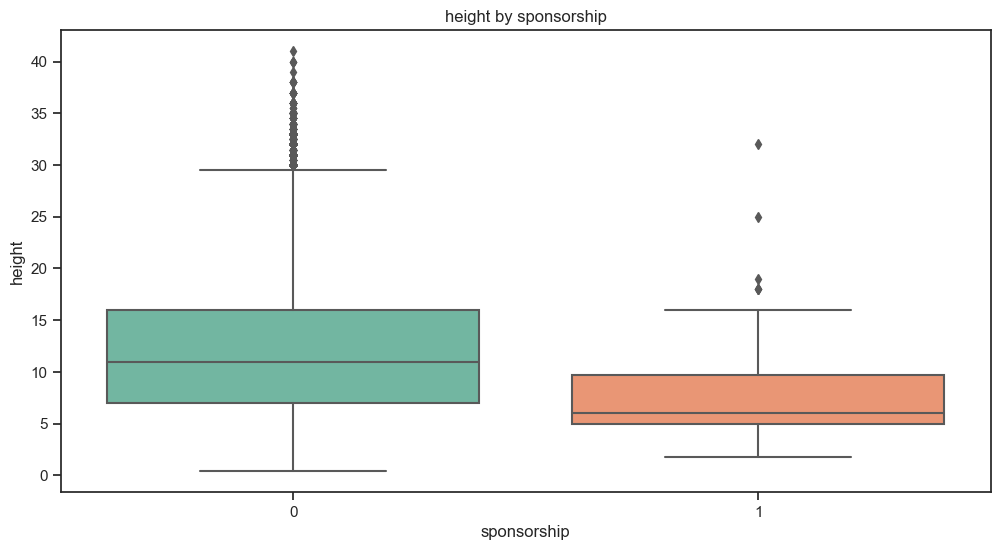

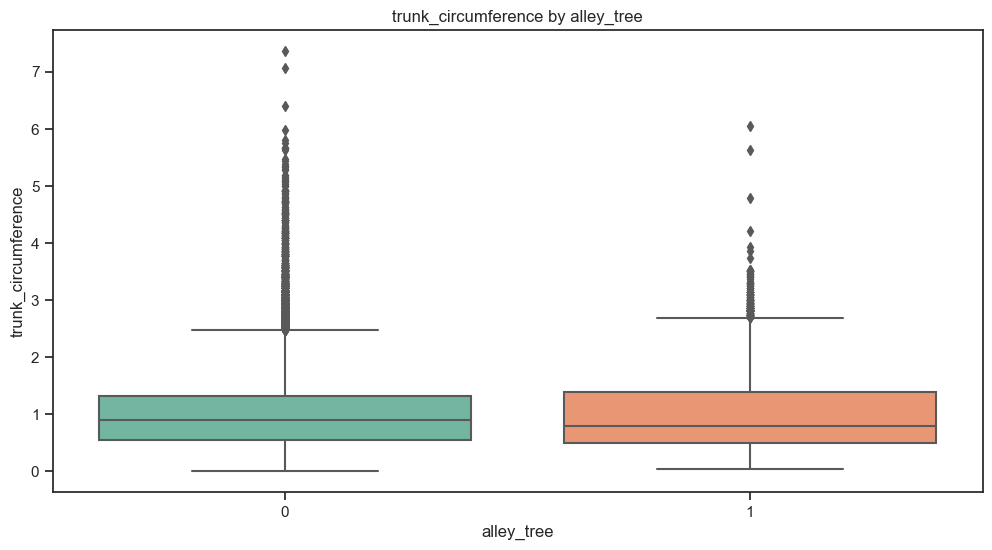

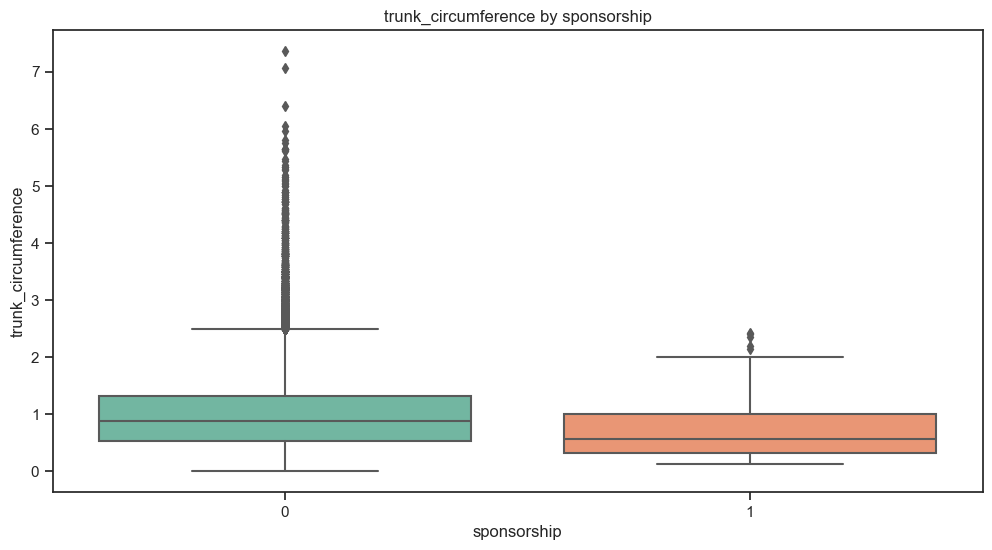

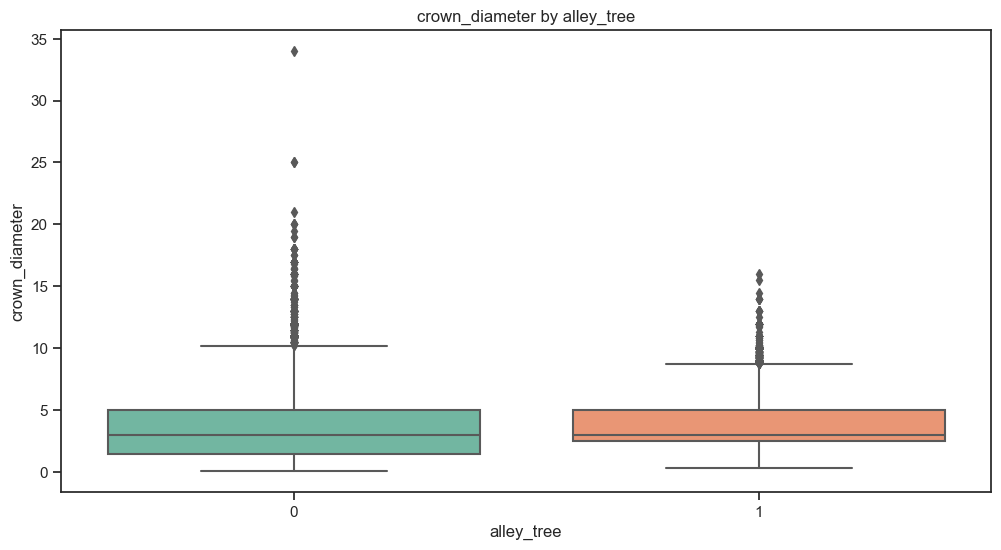

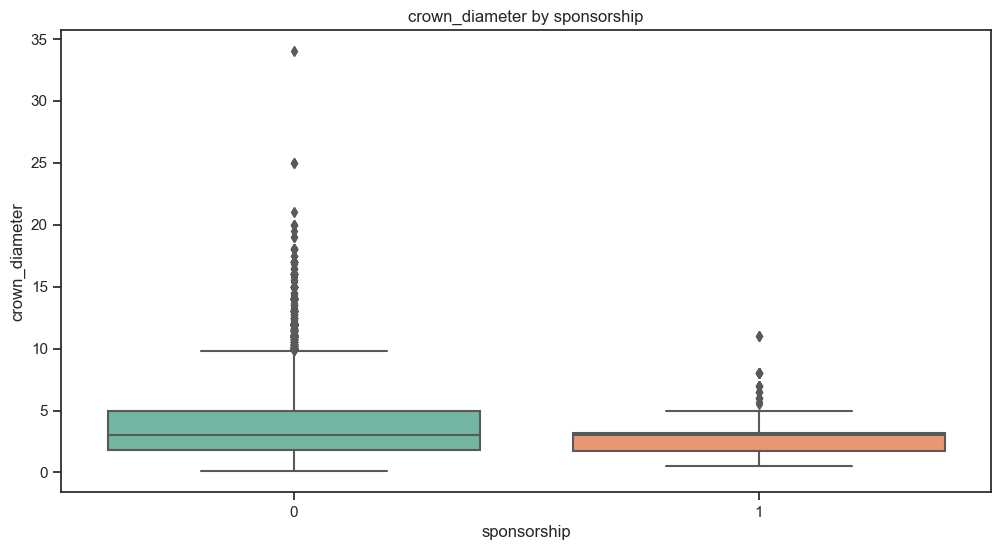

In [46]:
for num_col in num:
    for cat_col in cat_binary:
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            x=cat_col,
            y=num_col,
            data=df4,
            palette="Set2"
        )
        plt.title(f"{num_col} by {cat_col}")
        plt.xlabel(cat_col)

<h4 style="color: #bb1010;">Violin Plots</h4>

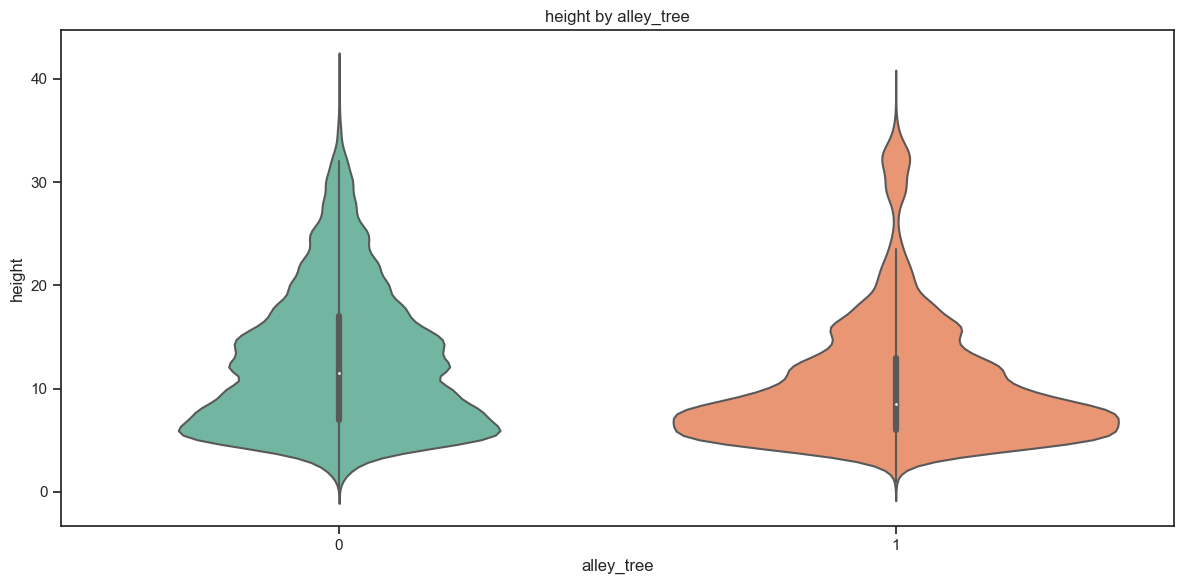

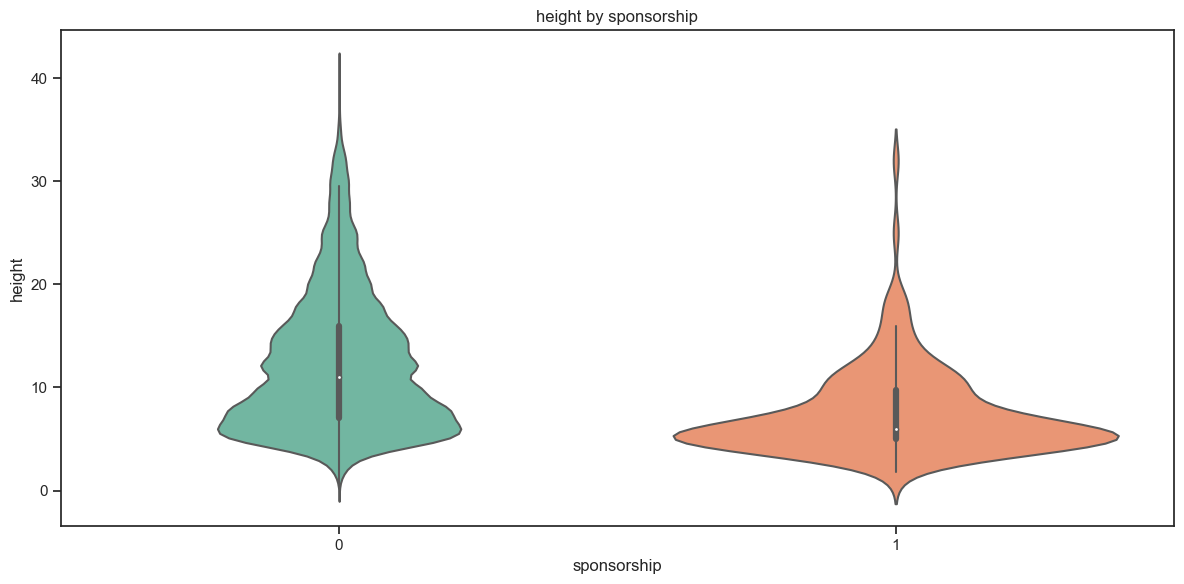

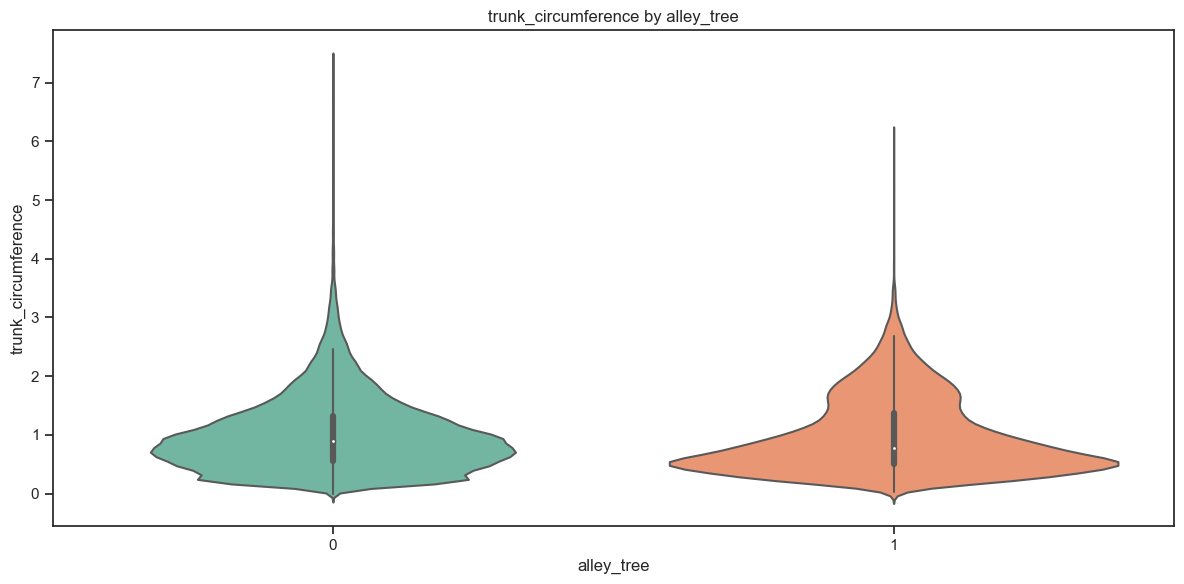

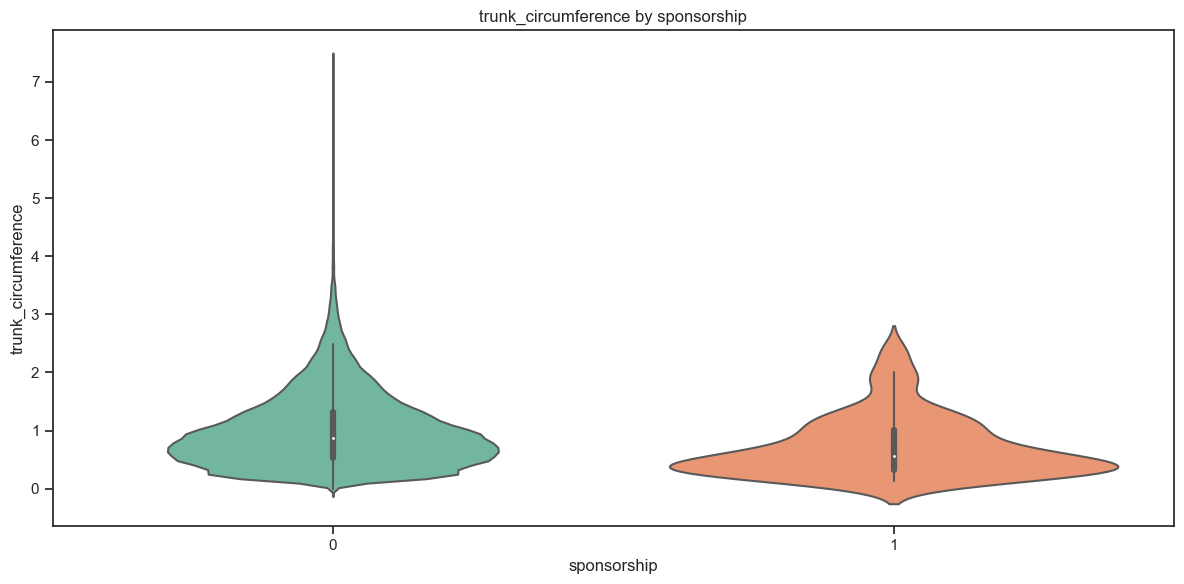

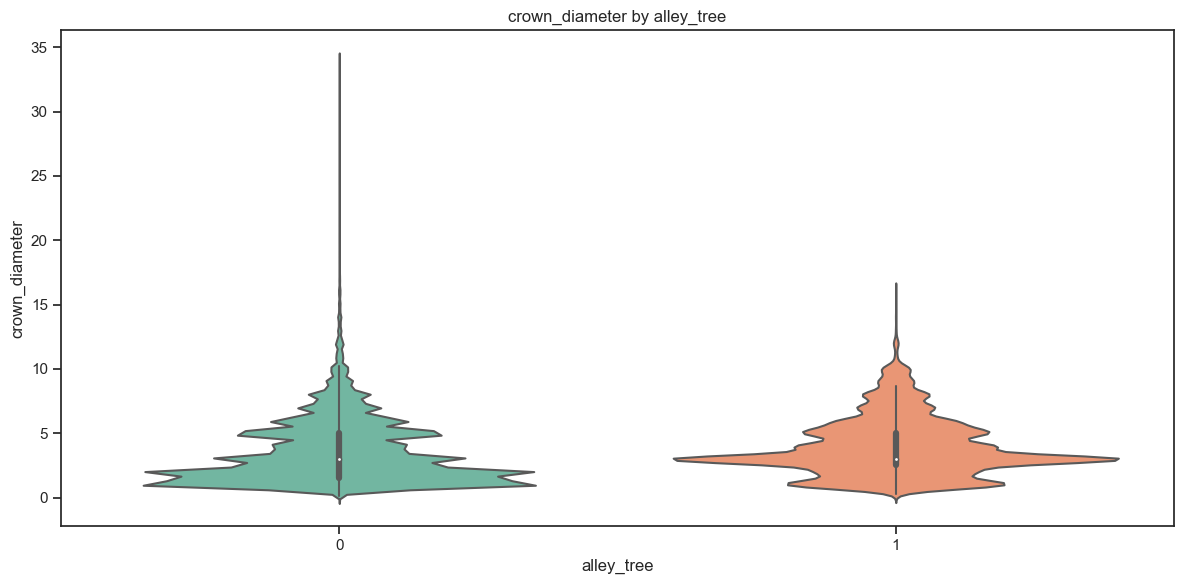

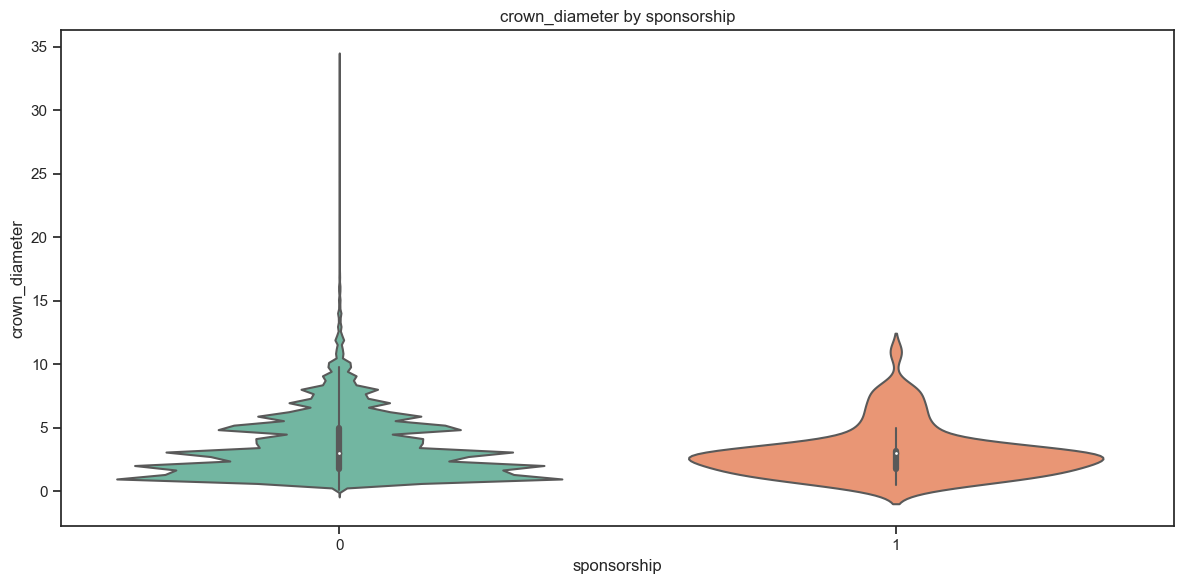

In [48]:
for num_col in num:
    for cat_col in cat_binary:
        plt.figure(figsize=(12, 6))
        sns.violinplot(
            x=cat_col,
            y=num_col,
            data=df4,
            palette="Set2"
        )
        plt.title(f"{num_col} by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.tight_layout()
        plt.show()


In [49]:
print(df4.groupby("sponsorship")["height"].mean())
print("")
print(df4.groupby("alley_tree")["height"].mean())

sponsorship
0   12.22
1    7.49
Name: height, dtype: float64

alley_tree
0   12.59
1   10.41
Name: height, dtype: float64


In [50]:
print(df4.groupby("sponsorship")["trunk_circumference"].mean())
print("")
print(df4.groupby("alley_tree")["trunk_circumference"].mean())

sponsorship
0   1.01
1   0.72
Name: trunk_circumference, dtype: float64

alley_tree
0   1.01
1   0.98
Name: trunk_circumference, dtype: float64


In [51]:
print(df4.groupby("sponsorship")["crown_diameter"].mean())
print("")
print(df4.groupby("alley_tree")["crown_diameter"].mean())

sponsorship
0   3.60
1   3.08
Name: crown_diameter, dtype: float64

alley_tree
0   3.53
1   3.95
Name: crown_diameter, dtype: float64


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Interesting Findings: Box and Violin PLots</strong> showing the relationship between alley_tree/ sponsorship and:
<p></p>
<p>Height</p>
    <ul>
        <li>Alley trees: are <strong>lower</strong> and ¾ of height values (IQR) are in a relatively small range. The violin plot shows the <strong>high concentration at around ~6-7 metres</strong>. The difference between the means is not very big.</li>
        <li>Sponsored trees: are <strong>even lower</strong> and ¾ of height values <strong>(IQR) are in an even smaller range. Here, the violin plot also displays this very well. Also, the <strong>means are significantly different</strong>.</li>
    </ul>
<p>Trunk Circumference</p>
    <ul>
        <li>Alley trees: there does not seem to be a significant difference although the concentration of values at ~0.6-0.7 is higher for alley trees. The means are not very different.</li>
        <li>Sponsored trees: The boxplot shows that there is a difference between sponsored and non-sponsored trees. Also, I added a mean calculation which shows that <strong>trunk circumference seems to have a strong influence on sponsorship: sponsored trees are smaller</strong>. The violin plot shows that there seem to be no outliers at all for sponsored trees, the values are <strong>exclusively concentrated at very low values</strong>.</li>
    </ul>
<p>Crown Diameter</p>
    <ul>
        <li>Alley trees: Regarding the IQR, there is a <strong> difference</strong> between crown diameters of trees which are along alleys to those which are not. The latter have more extreme outliers which can also be seen in the violin plot. The means differ moderately </li>
        <li>Sponsored trees: There are more <strong> differences</strong> between sponsored and non-sponsored trees: The <strong>IQR is much bigger and there are very few outliers</strong>. The distribution in general is <strong>very little dispersed</strong>. The means differ moderately. </li>
   </ul>
</div>
  </ul>
</div>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Interesting Findings: Box and Violin PLots</strong> showing the relationship between alley_tree/ sponsorship and:
<p></p>
<p>Height</p>
    <ul>
        <li>Alley trees: are <strong>lower</strong> and ¾ of height values (IQR) are in a relatively small range. The violin plot shows the <strong>high concentration at around ~6-7 metres</strong>. The difference between the means is not very big.</li>
        <li>Sponsored trees: are <strong>even lower</strong> and ¾ of height values <strong>(IQR) are in an even smaller range. Here, the violin plot also displays this very well. Also, the <strong>means are significantly different</strong>.</li>
    </ul>
<p>Trunk Circumference</p>
    <ul>
        <li>Alley trees: there does not seem to be a significant difference although the concentration of values at ~0.6-0.7 is higher for alley trees. The means are not very different.</li>
        <li>Sponsored trees: The boxplot shows that there is a difference between sponsored and non-sponsored trees. Also, I added a mean calculation which shows that <strong>trunk circumference seems to have a strong influence on psponsorshi: sponsored trees ae smallerp<strong>.  The violin plot shows that there seem to be no outliers at all for sponsored trees, the values are <strong>exclusively concentrated at very </strong>low values.</li>
    </ul>
<p>Crown Diameter</p>
    <ul>
        <li>Alley trees: Regarding the IQR, there is a <strong> difference</strong> between crown diameters of trees which are along alleys to those which are not. The latter have more extreme outliers which can also be seen in the violin plot. The means differ moderately </li>
        <li>Sponsored trees: There are more <strong> differences</strong> between sponsored and non-sponsored trees: The <strong>IQR is much bigger and there are very few outliers</strong>. The distribution in general is <strong>very little dispersed</strong>. The means differ moderately. </li>
   </ul>
</div>
  </ul>
</div>


In [54]:
# a correlation analysis supports the above described relationships for 
df4.groupby('sponsorship')[['height', 'trunk_circumference']].corr()

height  trunk_circumference
sponsorship                                                 
0           height                 1.00                 0.69
            trunk_circumference    0.69                 1.00
1           height                 1.00                 0.72
            trunk_circumference    0.72                 1.00

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>More Testing in Sponsorship</strong>
<p>Some findings from the above diagrams and calculations are interesting enough to do some more tests. For the relationship between sponsorship-height and sponsorship-trunk_circumference (see above for a simple correlation which supports these findings), I will do a t-test. This can be found in the notebook called "inferential-trees" in the GitHub repo.</p>
</div>

<h2 style="color: #ec7511;">C | Relationships between Categorial Columns</h2>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps:</strong>
<p>For the combinations of the three categorial columns genus, sponsorship and alley_tree, I will perform the following visualizations and statistical tests: crosstab, chi² (if there is a significant relationship), Cramer's V (how strong that relationship is). If I find a strong and significant relationsship, I will look into it more deeply and then also do some inferential statistics (in a different notebook which can also be found in the GitHub repo.</p>
<p>I will comment the findings in the Conclusions box at the end of the chapter.</p>
<p>First, I will only use the ten most common categories (tree genera) in the column genus (genus hast in total 85 categories which is too much to display in a crosstab). Following, I will also calculate the chi² p-value and the Cramer's V for all genera.</p>
</div>

<h3 style="color: #ec300e;">Ten Most Common Genera and Sponsorship</h3>

In [59]:
genus_ten = df4["genus"].value_counts(ascending=False).index[:10]
df_genus_ten = df4[df4["genus"].isin(genus_ten)]
df_genus_ten.genus.value_counts()

genus
Lime      12476
Maple     11874
Birch      7009
Oak        6523
Willow     3891
Poplar     2930
Cherry     2822
Ash        2674
Rowan      2311
Beech      1850
Name: count, dtype: int64

In [60]:
# crosstab of genus (only ten most common) and sponsorship
crosstab_genus_sponsor = pd.crosstab(df_genus_ten.genus, df_genus_ten.sponsorship)
crosstab_genus_sponsor

sponsorship,0,1
genus,,
Ash,2674,0
Beech,1849,1
Birch,7004,5
Cherry,2816,6
Lime,12417,59
Maple,11863,11
Oak,6520,3
Poplar,2929,1
Rowan,2295,16


In [61]:
# chi-square test for genus and sponsorship
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_genus_sponsor)
chi2_pvalue

9.293535877917135e-20

In [62]:
association(crosstab_genus_sponsor, method='cramer')

0.04518346820863189

<h4 style="color: #bb1010;">All Data in Genus and Sponsorship</h4>

To rule out the possibility that I might be missing some significant results by limiting the number of genera, I will also check the chi² p-value and the Cramer's V for all genera 

In [64]:
# chi-square test for all genera genus and sponsorship
crosstab_all_genus_sponsor = pd.crosstab(df4.genus, df4.sponsorship)
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_all_genus_sponsor)
chi2_pvalue

6.542657769958794e-57

In [65]:
association(crosstab_all_genus_sponsor, method='cramer')

0.08231039853246598

<h3 style="color: #ec300e;">Genus and Alley Tree</h3>

In [67]:
# crosstab of genus (only ten most common) and alley_tree
crosstab_genus_alley = pd.crosstab(df_genus_ten.genus, df_genus_ten.alley_tree)
crosstab_genus_alley

alley_tree,0,1
genus,,
Ash,2089,585
Beech,1848,2
Birch,6756,253
Cherry,2578,244
Lime,5737,6739
Maple,9926,1948
Oak,6272,251
Poplar,2826,104
Rowan,1560,751


In [68]:
# chi-square test for genus and sponsorship
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_genus_alley)
"{:.50f}".format(chi2_pvalue)

'0.00000000000000000000000000000000000000000000000000'

In [69]:
association(crosstab_genus_alley, method='cramer')

0.4952823557986686

In [70]:
proportions = crosstab_genus_alley.div(crosstab_genus_alley.sum(axis=1), axis=0)
print(proportions)

alley_tree    0    1
genus               
Ash        0.78 0.22
Beech      1.00 0.00
Birch      0.96 0.04
Cherry     0.91 0.09
Lime       0.46 0.54
Maple      0.84 0.16
Oak        0.96 0.04
Poplar     0.96 0.04
Rowan      0.68 0.32
Willow     0.97 0.03


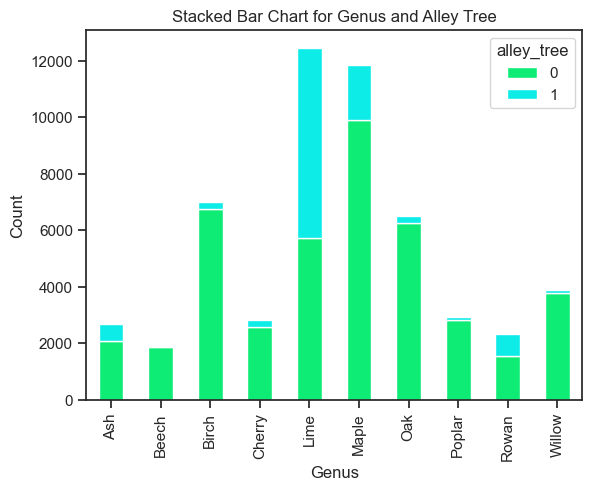

In [71]:
crosstab_genus_alley.plot(
    kind='bar', 
    stacked=True, 
    color=['#0eec75', '#0eece8']
)

plt.title('Stacked Bar Chart for Genus and Alley Tree')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.show()

<h4 style="color: #bb1010;">All Data in Genus and Alley Tree</h4>

Again: To see how the values change when I use all genera, I will also check the chi² p-value and the Cramer's V for this case 

In [73]:
# chi-square test for all genera genus and sponsorship
crosstab_all_genus_alley = pd.crosstab(df4.genus, df4.alley_tree)
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_all_genus_alley)
"{:.50f}".format(chi2_pvalue)

'0.00000000000000000000000000000000000000000000000000'

In [74]:
association(crosstab_all_genus_alley, method='cramer')

0.505825836689588

In [75]:
proportions_all_genera = crosstab_all_genus_alley.div(crosstab_all_genus_alley.sum(axis=1), axis=0)
proportions_all_genera.sort_values(by=1, ascending=False)

alley_tree,0,1
genus,,
sophora,0.36,0.64
ginkgo,0.40,0.60
Lime,0.46,0.54
corylus,0.49,0.51
morus,0.55,0.45
...,...,...
juglans,1.00,0.00
juniperus,1.00,0.00
koelreuteria,1.00,0.00


In [129]:
print(df3[df3["genus"] == "sophora"].count())
print("")
print(df3[df3["genus"] == "ginkgo"].count())

lat                    170
long                   170
genus                  170
species                170
alley_tree             170
height                 170
trunk_circumference    170
crown_diameter         170
sponsorship            170
variety                170
dtype: int64

lat                    104
long                   104
genus                  104
species                104
alley_tree             104
height                 104
trunk_circumference    104
crown_diameter         104
sponsorship            104
variety                104
dtype: int64


In [143]:
crosstab_all_genus_alley.sort_values(by=1, ascending=False)

alley_tree,0,1
genus,,
Lime,5737,6739
Maple,9926,1948
Rowan,1560,751
Ash,2089,585
corylus,265,273
...,...,...
juglans,165,0
juniperus,14,0
koelreuteria,23,0


<h3 style="color: #ec300e;">Alley Tree and Sponsorship</h3>

In [80]:
# crosstab of alley_tree and sponsorship
crosstab_alley_sponsor = pd.crosstab(df_genus_ten.alley_tree, df_genus_ten.sponsorship)
crosstab_alley_sponsor

sponsorship,0,1
alley_tree,,
0,43310,48
1,10944,58


In [81]:
# chi-square test for genus and sponsorship
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_alley_sponsor)
"{:.20f}".format(chi2_pvalue)

'0.00000000000000000272'

In [82]:
association(crosstab_alley_sponsor, method='cramer')

0.03793027937542104

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: Relationships between Categorial Data</strong>
<p>I will only highlight significant and strong relationships:</p>
    <ul>
        <li>Some categorial columns show a very low p-value when calculating the chi² which points to a highly significant result. Yet, after checking Cramer’s V, it proved that the relationship between them is of not strong after all. The Cramer’s V is more accurate when it comes to unequally distributed values (the sponsorship and alley_tree columns have very unevenly distributed values).</li>
        <li>There is a <strong>highly significant and strong</strong> (although not very strong) connection between <strong>genus and alley_tree</strong>, so it appears that some genera are much more likely to be part of an alley than others.</li>
        <li>For the ten most common genera, we can see from the crosstab and the stacked bar chart that especially <strong>lime trees</strong> are much more often alongside an alley. To a lesser degree, this is also true for <strong>maple trees</strong>. Lime trees are even more often part of an alley than they are not.</li>
        <li>When looking at all genera (not only the ten most common), the lime (by far) and maple tree dominate alleys. Yet when <strong>looking at the proportions</strong>, there are two trees of which an even higher share  is part of alleys: <strong>sophora</strong> (japanese pagoda tree) and <strong>ginkgo</strong> (maidenhair tree).</li>
    </ul>
</div>

<h1 style="color: #e3db24;">02 | Summary Of EDA Findings (Spotlights)</h1>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>EDA Spotlights:</strong>
<p>Tree Measurements (Continuous Data):</p>
    <ul>
        <li>All tree measurements are (extremely) <strong>positively skewed</strong> and have a <strong>high kurtosis</strong>. This means that most values are <strong>concentrated at the lower range</strong> of the scales. There also are <strong>several outliers</strong> at the higher range of values.</li>
        <li>Only <strong>height and trunk circumference</strong> have a <strong>strong positive correlation</strong>.</li>
    </ul>
<p>Tree Measurements vs. Genus, Sponsorship and Alley Tree (Categorial Data):</p>
    <ul>
        <li>Genus: <strong>Lime trees</strong> reach the greatest heights and trunk circumference, <strong>birch trees</strong> have the lowest values regarding these two measurements and also the smallest diameters of crowns, here <strong>maple trees</strong> reach the greatest values.</li>
        <li>Sponsorship: <strong>Sponsored trees are lower and have a smaller trunk circumference</strong>  than non-sponsored trees.</li>
    </ul>
<p>Connections between Genus, Sponsorship and Alley Tree (Categorial Data):</p>
    <ul>
        <li>There is only one <strong>highly significant and strong connection</strong>: between <strong>genus and alley_tree</strong>, some tree genera are <strong>much more likely to be part of an alley than others</strong>. In absolute numbers, <strong>lime trees</strong> stick out, followed by maple trees. In proportional terms (share within an genera that are alley trees), two trees have an even higher share than lime trees: The Japanese pagoda tree and the maidenhair tree. </li>
   </ul>
</div>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Outlook: Inferential Statistics</strong>
<p>In the GitHub repo, you will find another Jupyter Notebook called <strong>"inferential-trees"</strong>. In this, I will do <strong>t-tests for the following two hypothesis</strong>:</p>
    <ol>
        <li>Sponsored trees are lower than non-sponsores trees.</li>
        <li>The trunk circumferences of sponsored trees are smaller than those of non-sponsored trees.</li>
    </ol>
</div>